План:
1. Выбрать один линейный и один нелинейный метод уменьшения размерности. 
2. Запустить их на своих данных (желательно использовать seaborn и plotly для визуализации результатов)
3. Обосновать выбор количества компонентов / размерностей и объяснить их


В файле №3 я уменьшал размерность путём удаления коррелирующих столбцов.  
Это делается на основе линейной корреляции Пирсона и является линейным методом сокращения размерности.  
В данном случае объяснением выбора компонентов был тот факт, что сильно коррелирущие столбцы в датасете являются избыточными.  
В случае, если бы строк было меньше, НЕ удаление этих столбцов могло бы привести к "проклятию размерности".  

ОДНАКО, для наглядности и эксперемента ради, применю ещё два метода уменьшения размерности.     
Линейный PCA без ядерных функций  
и UMAP.

In [110]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('dataset_normalization__v2.3.csv')

In [112]:
pca = PCA(n_components=0.95)  
X_reduced = pca.fit_transform(df.drop(['smiles', 'gap'], axis=1))

print('Исходная размерность:', df.drop(['smiles', 'gap'], axis=1).shape)
print('Пониженная размерность:', X_reduced.shape) 
print('Объясненная дисперсия:', sum(pca.explained_variance_ratio_))

Исходная размерность: (16490, 175)
Пониженная размерность: (16490, 61)
Объясненная дисперсия: 0.9511110868078972


Исходя из объяснённой дисперсии равной 95% мы видим, что 61 компонента вполне достаточно.  
Избыточность устранена. 

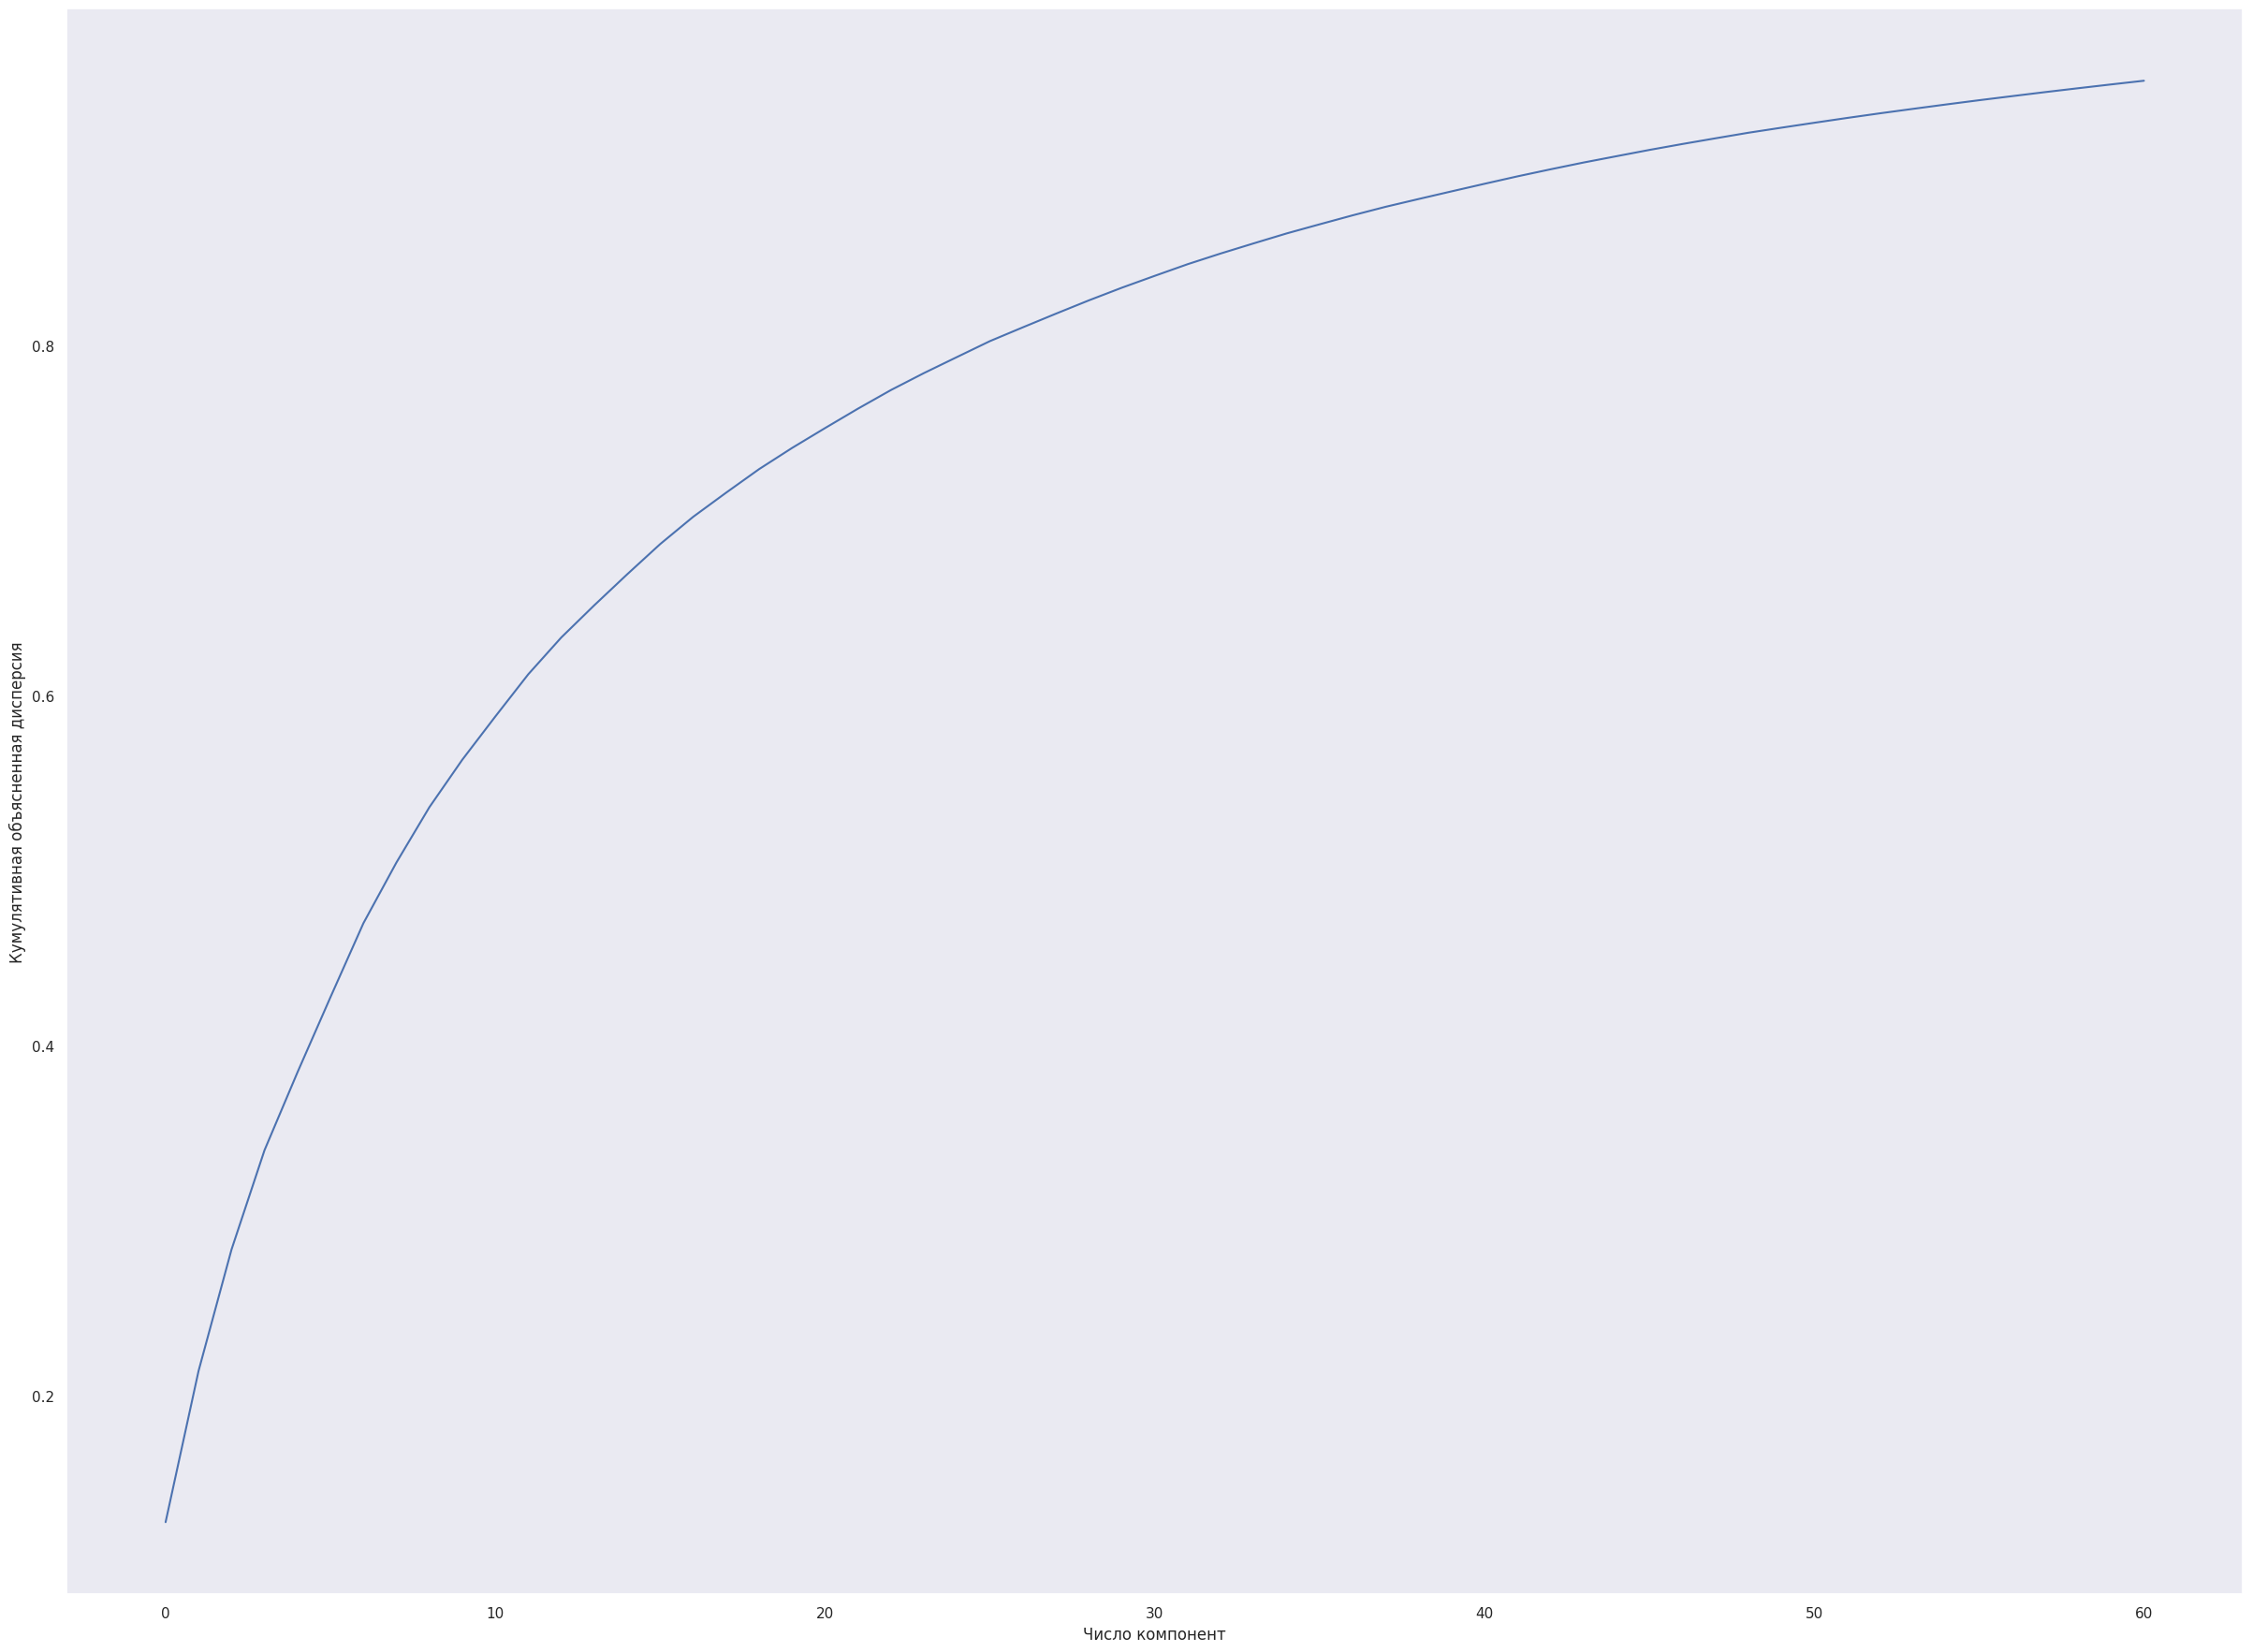

In [113]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Число компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.grid()

n_components = 61
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(df.drop('smiles', axis=1))

In [114]:
n_components = 61
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(df.drop(['smiles', 'gap'], axis=1))

new_df = pd.DataFrame(X_reduced)
new_df['smiles'] = df['smiles']
new_df['gap'] = df['gap']

print(new_df.shape)
new_df

(16490, 63)


,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,smiles,gap
0,-0.562489,0.630938,-0.709024,0.153706,0.227586,0.093760,-0.000980,0.251019,-0.144579,-0.286367,...,0.093716,0.000036,0.085001,-0.007364,0.061485,0.131232,-0.090100,0.017323,N=C1OCC2=C1ON=C2,0.374591
1,0.306667,-0.167819,-0.508875,0.193999,-0.544756,-0.493497,0.217452,0.003128,-0.095734,0.187467,...,0.037805,-0.059233,-0.057866,-0.089513,-0.068715,0.036187,-0.086054,-0.005047,O=C1CCC11C2CCN12,0.387385
2,0.278600,-0.418607,-0.118331,0.225714,0.091817,0.245929,0.855817,-0.300128,0.195795,-0.202910,...,0.057092,-0.030397,-0.077751,-0.018595,-0.075231,-0.036330,0.111681,-0.068999,O=CC1CCC2OCC12,0.424278
3,0.688534,0.350085,-1.051756,0.402856,0.066196,0.104259,0.423833,0.318708,-0.326733,0.026805,...,0.074733,0.059995,0.191946,-0.037698,0.141349,-0.168062,0.030100,0.016702,C1C2C3N=C4OC1C4C23,0.379946
4,-0.041598,-0.465372,-0.176061,-0.557432,0.263690,0.074901,-0.439579,0.091602,0.307701,-0.383285,...,-0.014388,-0.024493,0.114010,0.037069,0.046138,-0.050928,-0.044936,0.077362,CC1(O)C2CC1(O2)C#C,0.529604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16485,-0.173752,0.644016,-0.599059,-0.221979,0.024556,-0.002688,0.421316,0.407779,-0.311203,-0.268762,...,-0.003259,0.012706,-0.072985,-0.000642,-0.035770,0.008162,-0.092848,-0.000008,c1coc2c1C(=O)CC2,0.398096
16486,-0.326065,0.203733,-0.257154,0.070534,-0.683245,-0.148914,-0.404755,0.038189,0.723712,0.389277,...,0.027127,0.005993,-0.190037,-0.005162,0.020226,0.038417,0.225514,-0.053550,CC1CN1C(=N)C#N,0.382624
16487,-1.003912,-0.328250,-0.145512,-0.201196,0.068091,-0.449502,0.331198,0.300789,-0.101439,-0.187232,...,0.045449,0.021548,0.182419,-0.042952,-0.018724,0.224334,-0.050970,0.079347,COC1CC(=N)OC1=O,0.484082
16488,-0.086001,-0.753930,-0.500610,0.171508,0.788793,0.444747,-0.601452,0.480294,0.348392,0.316386,...,-0.092754,-0.029982,0.071004,0.059970,-0.108727,-0.103230,0.011052,0.027892,OC1CC11OCC1O,0.639096


In [115]:
# Сохранение в CSV-файл
new_df.to_csv('dataset_PCA__v2.4.csv', index=False)

### Видно, что после ~60 компонент кривая выходит на плато. Идти далее нецелесообразно.
### Обоснование кол-ва компонент сделано.
### Далее нужно объяснить компоненты

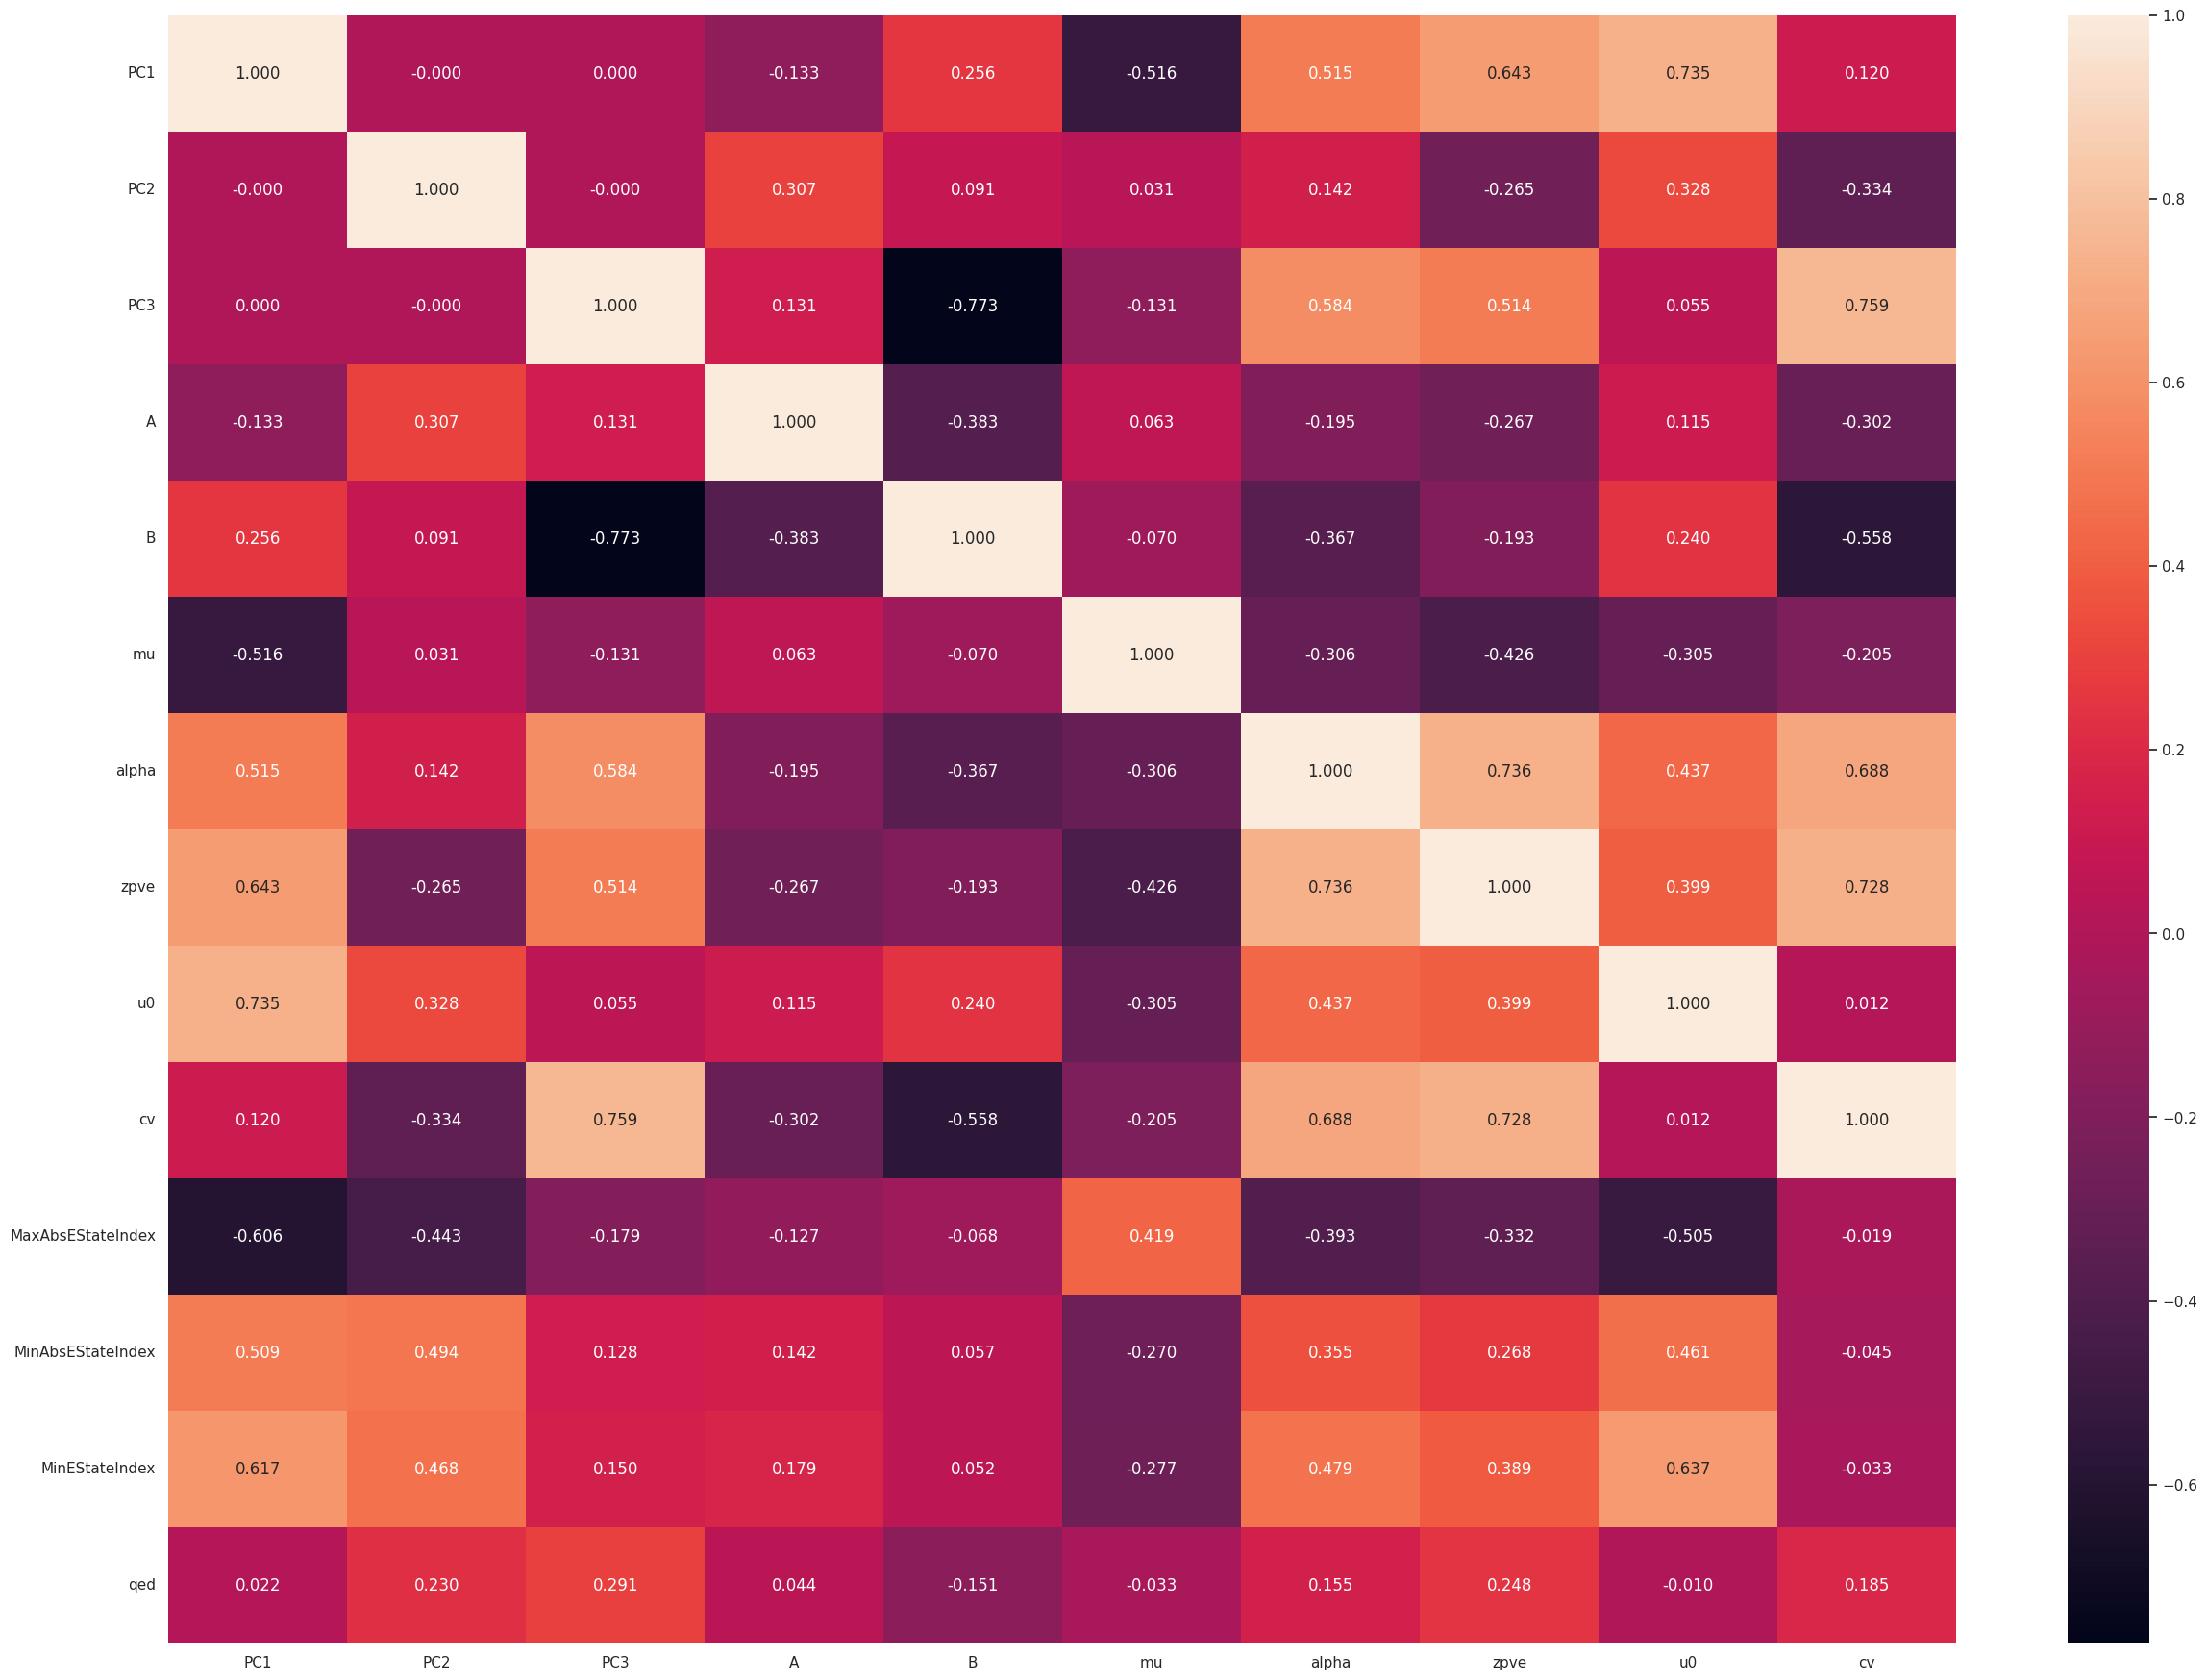

In [71]:
#Combine the original data and first three PCs
df_pc = pd.DataFrame(data = X_reduced, columns = [f'PC{i}' for i in range(1,62)])
df_col = pd.concat([df_pc[['PC1','PC2','PC3']],pd.DataFrame(df.drop(['smiles', 'gap'], axis=1), columns=df.drop(['smiles', 'gap'], axis=1).columns)], axis=1)
df_col

#difference the original data and PCAs
corMatrix = pd.DataFrame.corr(df_col)

# Выбор только первых 10 компонентов и исходных данных
corMatrix_subset = corMatrix.iloc[:14, :10]

#results
sns.set(rc={'figure.figsize':(30,22)})
sns.heatmap(corMatrix_subset, annot=True, fmt='.3f')
plt.show()

1. PC1 сильно коррелирует с признаком u0 (корреляция 0.735). Согласно описанию признаков, u0 - это внутренняя энергия молекулы. Значит, PC1 связана с изменчивостью внутренней энергии в данных.

2. PC2 сильно коррелирует с признаком minAbsEStateIndex (0.49). Этот признак характеризует электростатические взаимодействия в молекуле. Следовательно,   PC2 отражает изменчивость электростатических свойств.

3.  PC3 имеет высокую отрицательную корреляцию с признаком B (-0.79). B описывает ротационную постоянную молекулы. Значит, PC3 связана с вращательным движением, чем выше значения PC3, тем ниже ротационная постоянная.

4.  Таким образом, интерпретируя корреляции признаков с PC, мы можем понять основные источники изменчивости в данных, выявленные PCA. Это помогает объяснить полученные компоненты.

### Объяснение компонент сделано.

# Применение нелинейного метода


In [78]:
!pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable


In [85]:
import umap.umap_ as umap
import pandas as pd

In [91]:
df_drop_smiles = df.drop(['smiles', 'gap'], axis=1)

reducer = umap.UMAP()
embedding = reducer.fit_transform(df_drop_smiles)

print(f'Исходная размерность: {df_drop_smiles.shape[1]}')  
print(f'Пониженная размерность: {embedding.shape[1]}')

df_umap = pd.DataFrame(embedding, columns=[f'UMAP_{i}' for i in range(embedding.shape[1])])
df_combined = pd.concat([df_umap, df.drop(columns=['gap', 'smiles'])], axis=1)

Исходная размерность: 175
Пониженная размерность: 2


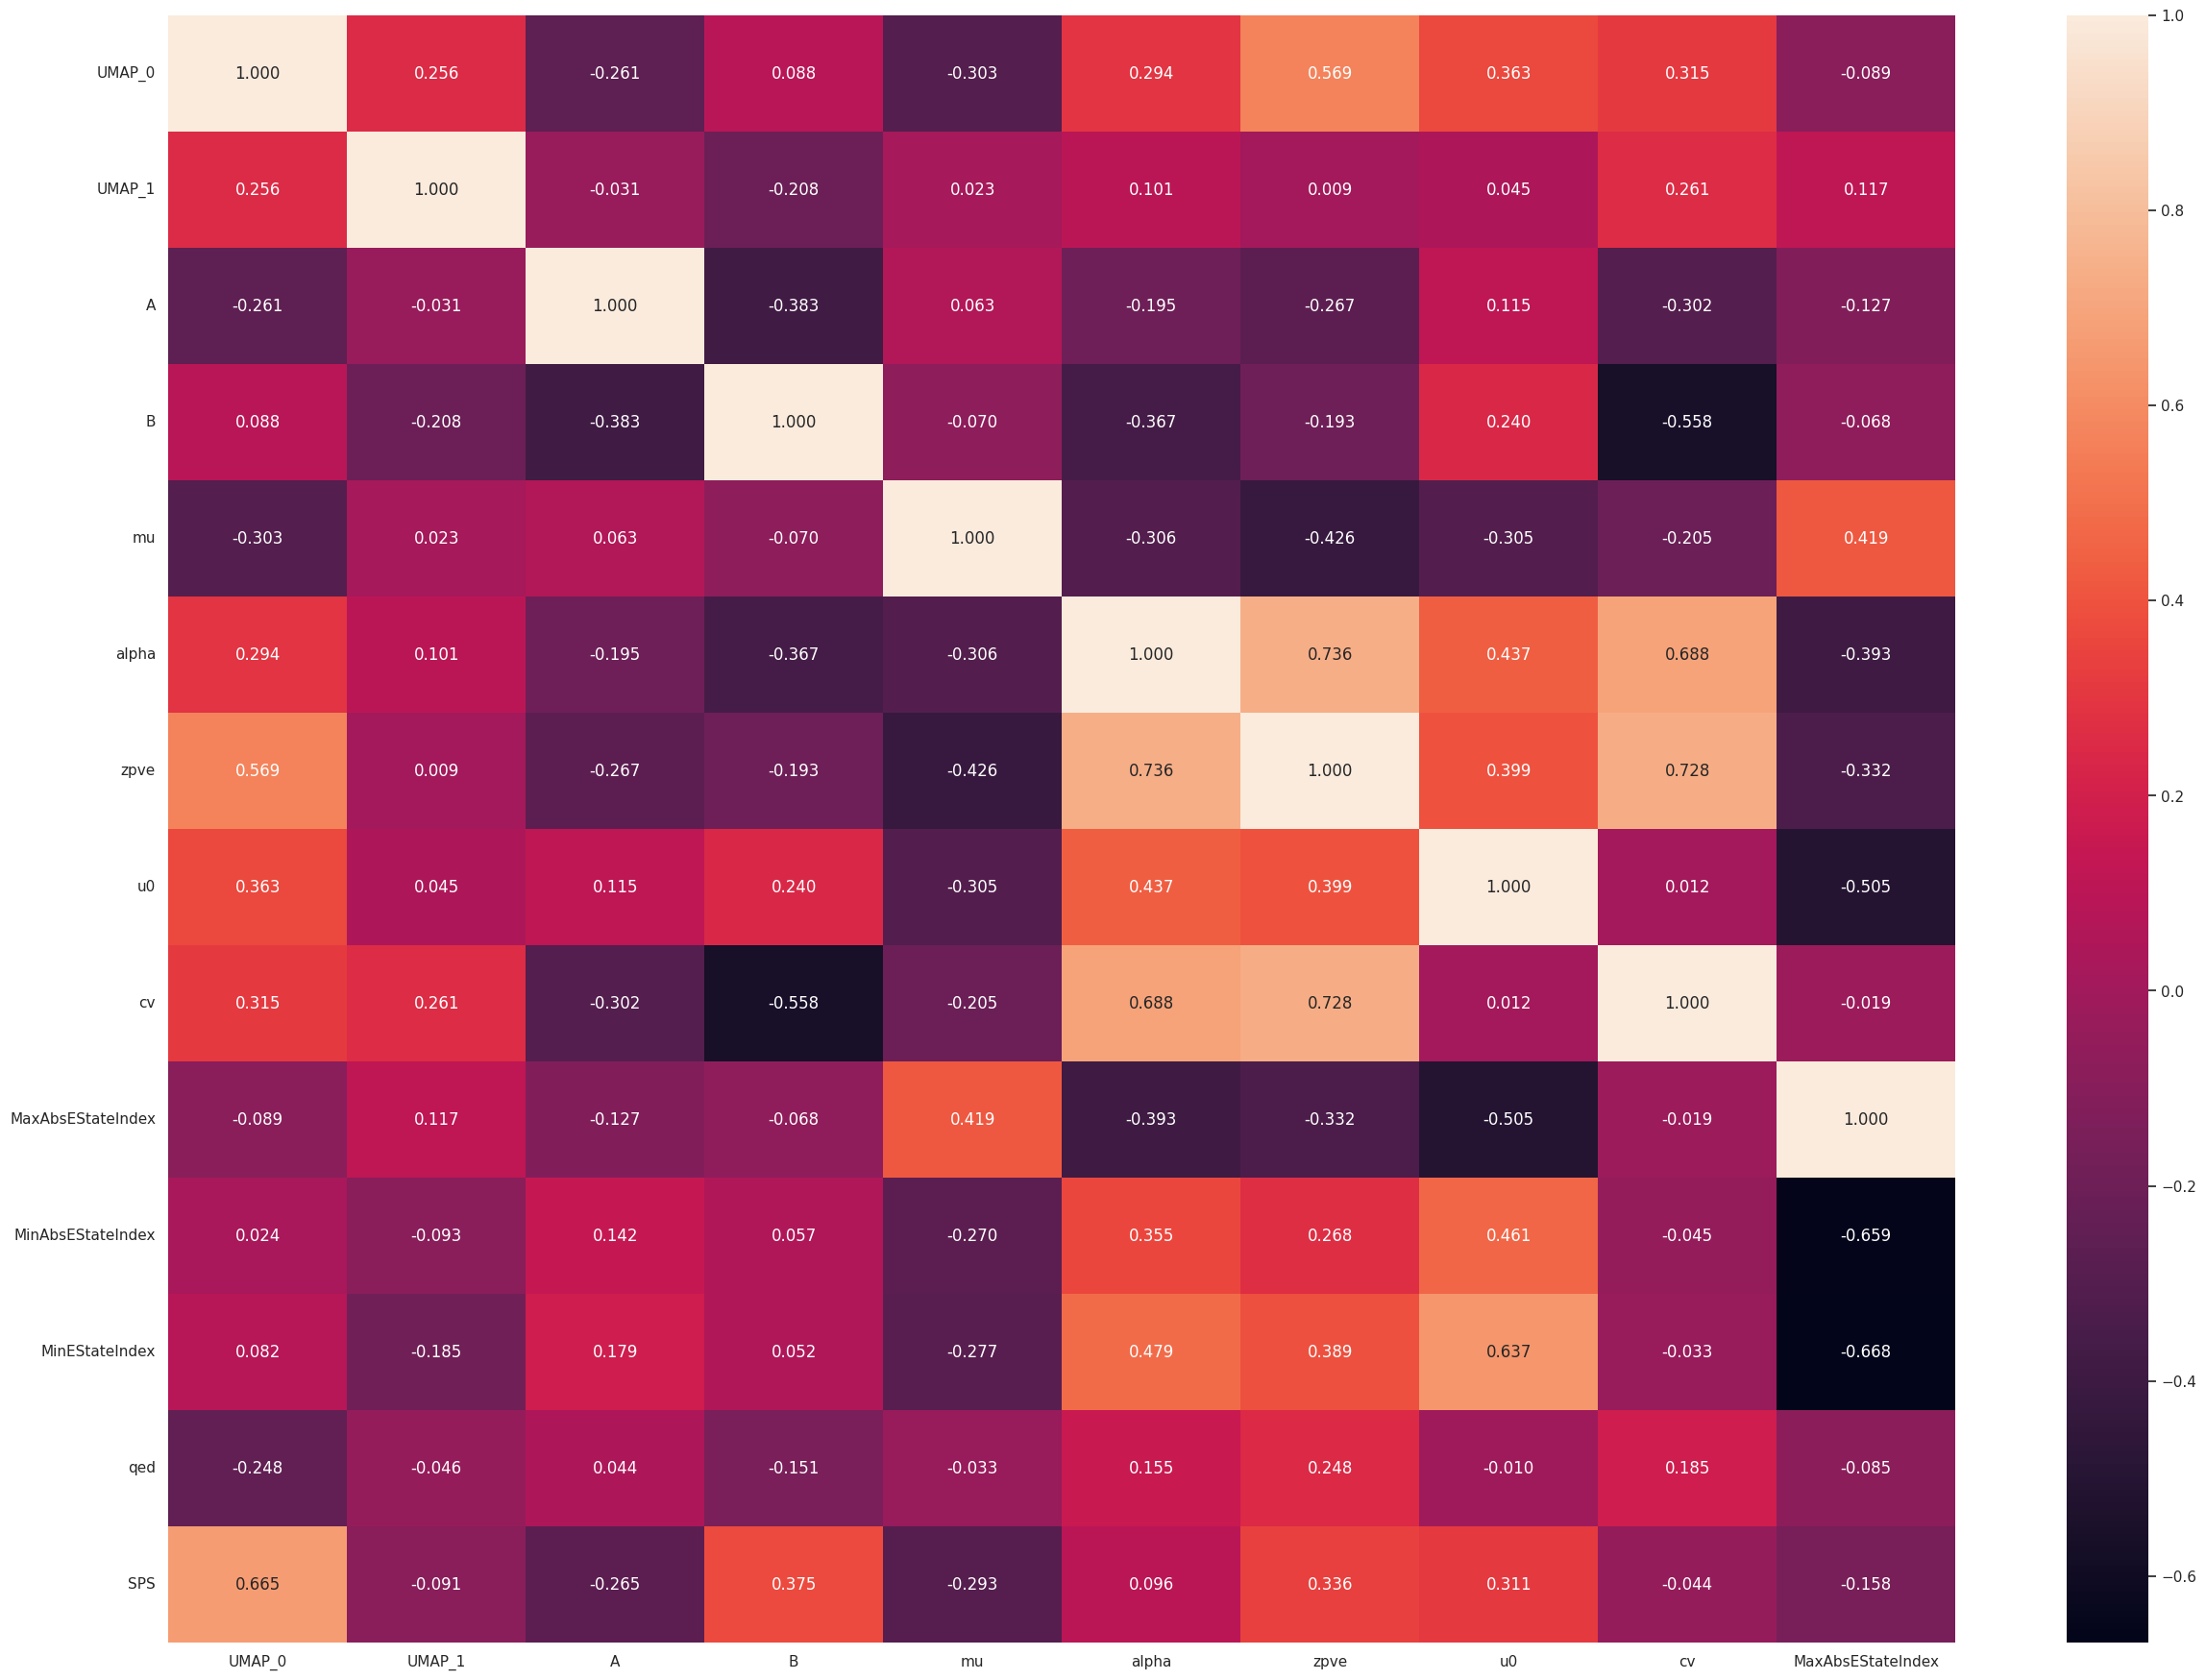

In [92]:


#difference the original data and PCAs
corMatrix = pd.DataFrame.corr(df_combined)

# Выбор только первых 10 компонентов и исходных данных
corMatrix_subset = corMatrix.iloc[:14, :10]

#results
sns.set(rc={'figure.figsize':(30,22)})
sns.heatmap(corMatrix_subset, annot=True, fmt='.3f')
plt.show()

Первая коррелирует с SPS
вторая почти ни с чем.
Использовать только 2 компоненты кажется не разумным. юзаем PCA